In [1]:
import pandas as pd
import numpy as np
import scipy.odr as odr
import matplotlib.pyplot as plt


In [2]:
def leer_datos(nombre):
    datos = pd.read_table(f'datos\\{nombre}', skiprows=26, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
    return datos

#def delta_E(Z): #Falta agregar la constante R para dsp ajustar y encontrar la cte estructura fina
#    return Z**4 / (2**3 * 2)

#Diccionario de el nombre del elemento y su numero Z
Z_dicc = {'Al': 13, 'Cu': 29, 'Ag': 47, 'Au': 79}

# Au (79)
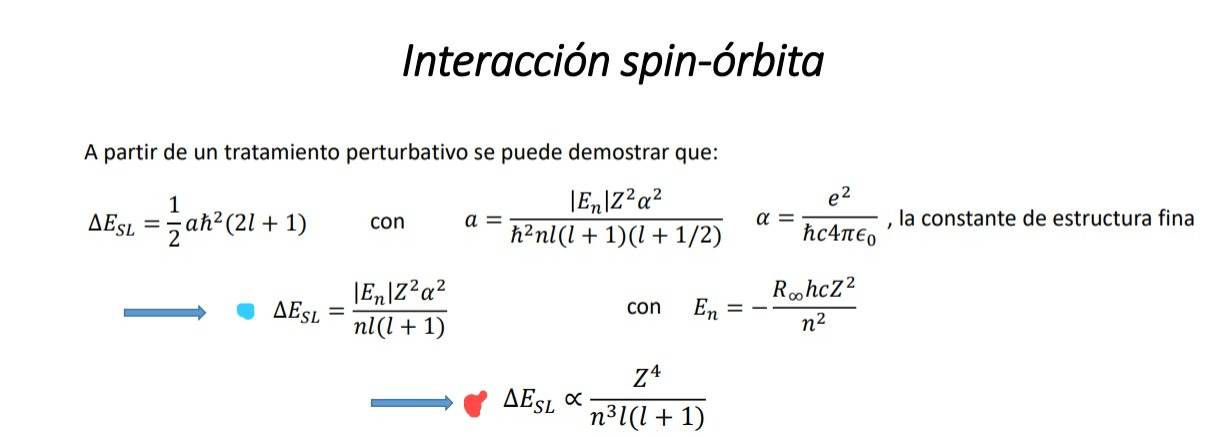

In [3]:
datos = pd.read_table(r'datos\Au.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
#mostrar solo la columna I
datos

,Energia (eV),Angulo,Tiempo,Io,I,Ln
0,11800.41,45.5330,1.0,96500.0,344793.0,-1.27340
1,11810.43,45.4922,1.0,96227.0,345152.0,-1.27727
2,11820.46,45.4515,1.0,95798.0,344674.0,-1.28036
3,11830.27,45.4117,1.0,96090.0,346119.0,-1.28150
4,11840.33,45.3709,1.0,96039.0,346510.0,-1.28316
...,...,...,...,...,...,...
133,13800.58,38.6457,1.0,72180.0,190543.0,-0.97071
134,13810.36,38.6172,1.0,71933.0,190094.0,-0.97178
135,13820.48,38.5878,1.0,72552.0,189592.0,-0.96057
136,13830.62,38.5584,1.0,72262.0,190510.0,-0.96941


In [4]:
datos['dx'] = datos['Ln'].diff()


In [5]:
#Printear los VALORES DE Energia en donde dx tenga un maximo
#max1 = datos['dx'].max()
datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 13500]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']


129    13760.62
Name: Energia (eV), dtype: float64

In [6]:
#plt.figure()
#plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
#plt.xlim(13750, 13800)
#plt.show()

AuL3 = 11900
AuL2 = 13760

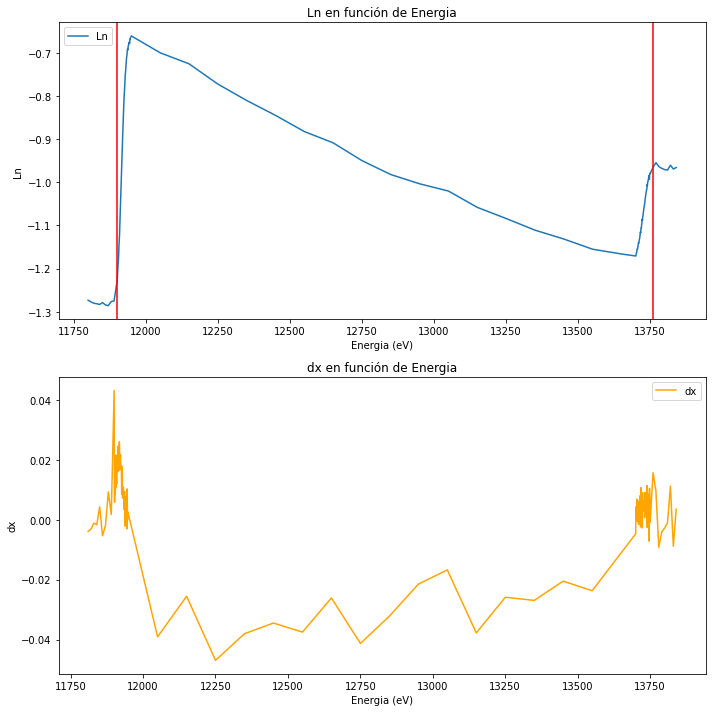

In [7]:
fig, axs = plt.subplots(2, figsize=(10,10))  # Crea una figura con 2 subplots

# Primer subplot: Ln vs Energia
axs[0].plot(datos['Energia (eV)'], datos['Ln'], label='Ln')
axs[0].axvline(x=AuL2, color='r', linestyle='-')
axs[0].axvline(x=AuL3, color='r', linestyle='-')
axs[0].set_xlabel('Energia (eV)')
axs[0].set_ylabel('Ln')
axs[0].legend()
axs[0].set_title('Ln en función de Energia')

# Segundo subplot: dx vs Energia
axs[1].plot(datos['Energia (eV)'], datos['dx'], label='dx', color='orange')
#axs[1].axvline(x=13770, color='r', linestyle='-')
#axs[1].axvline(x=11946.32, color='r', linestyle='-')
#axs[1].axhline(y=0, color='r', linestyle='-')

axs[1].set_xlabel('Energia (eV)')
axs[1].set_ylabel('dx')
axs[1].legend()
axs[1].set_title('dx en función de Energia')

plt.tight_layout()  # Asegura que los subplots no se superpongan
plt.show()

In [8]:
Au_dE = AuL2 - AuL3
print(f'El valor de la diferencia de energía de Au es {Au_dE} eV')

El valor de la diferencia de energía de Au es 1860 eV


# Ba (56)

In [9]:
datos = pd.read_table(r'datos\Ba.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()
datos

,Energia (eV),Angulo,Tiempo,Io,I,Ln,dx
0,5180.03,73.4871,1.0,7275.0,5224.0,0.33118,NaN
1,5190.06,73.3219,1.0,7501.0,5223.0,0.36196,0.03078
2,5200.06,73.1579,1.0,7781.0,5362.0,0.37235,0.01039
3,5210.04,72.9952,1.0,7636.0,5183.0,0.38749,0.01514
4,5220.05,72.8327,1.0,7878.0,5303.0,0.39580,0.00831
...,...,...,...,...,...,...,...
75,5655.04,66.4577,1.0,19951.0,2548.0,2.05797,0.07703
76,5665.05,66.3250,1.0,19733.0,2683.0,1.99536,-0.06261
77,5675.02,66.1935,1.0,20478.0,2846.0,1.97344,-0.02192
78,5685.03,66.0622,1.0,20593.0,2793.0,1.99783,0.02439


In [10]:
#datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] < 5300]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

6    5240.04
Name: Energia (eV), dtype: float64

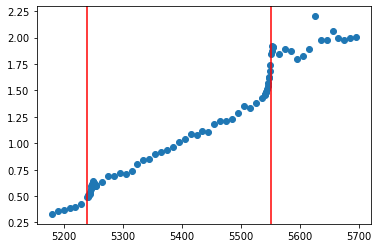

In [11]:
BaL3 = 5240
BaL2 = 5551

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=BaL2, color='r', linestyle='-')
plt.axvline(x=BaL3, color='r', linestyle='-')
plt.show()

In [12]:
Ba_dE = BaL2 - BaL3
print(f'El valor de la diferencia de energía de Ba es {Ba_dE} eV')

El valor de la diferencia de energía de Ba es 311 eV


# Ce (58)

In [13]:
datos = pd.read_table(r'datos\Ce.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [14]:
#datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 6000]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

99    6167.01
Name: Energia (eV), dtype: float64

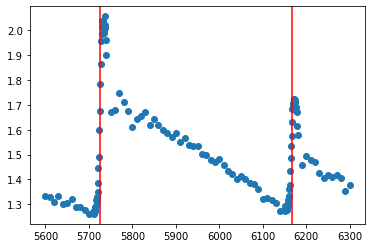

El valor de la diferencia de energía de Ce es 441 eV


In [15]:
CeL3 = 5726
CeL2 = 6167

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=CeL3, color='r', linestyle='-')
plt.axvline(x=CeL2, color='r', linestyle='-')
plt.show()

Ce_dE = CeL2 - CeL3
print(f'El valor de la diferencia de energía de Ce es {Ce_dE} eV')

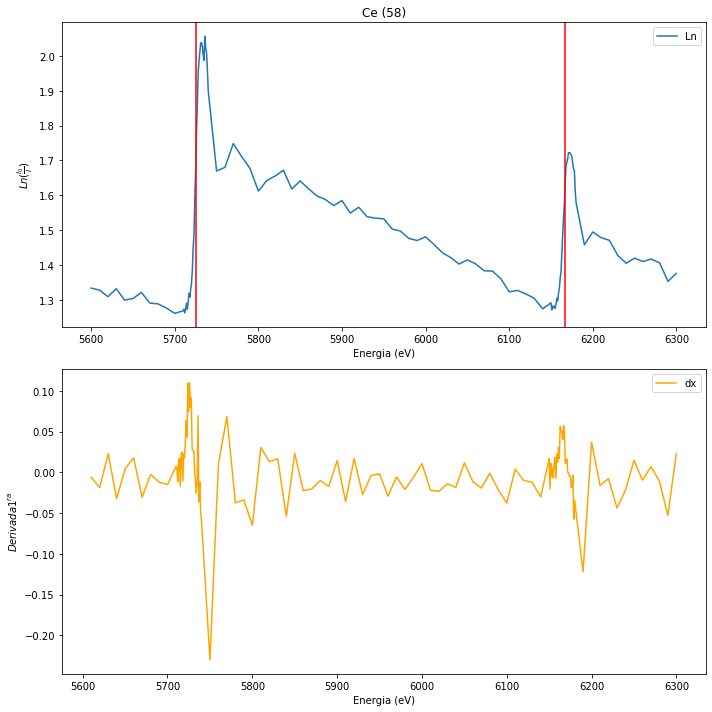

In [16]:
fig, axs = plt.subplots(2, figsize=(10,10))  # Crea una figura con 2 subplots

# Primer subplot: Ln vs Energia
if not datos.empty:
    axs[0].plot(datos['Energia (eV)'], datos['Ln'], label='Ln')
    axs[0].axvline(x=CeL2, color='r', linestyle='-')
    axs[0].axvline(x=CeL3, color='r', linestyle='-')
    axs[0].set_xlabel('Energia (eV)')

axs[0].set_ylabel(r'$Ln(\frac{I_{0}}{I})$')
axs[0].legend()
axs[0].set_ylabel(r'$Ln(\frac{I_{0}}{I})$')
axs[0].legend()
axs[0].set_title('Ce (58)')

# Segundo subplot: dx vs Energia
axs[1].plot(datos['Energia (eV)'], datos['dx'], label='dx', color='orange')
#valor_dx_CeL3 = datos.loc[datos['Energia (eV)'] == CeL3, 'dx'].values[0]  # Obtiene el valor de dx en Energia = CeL3
#valor_dx_CeL2 = datos.loc[datos['Energia (eV)'] == CeL2, 'dx'].values[0]  # Obtiene el valor de dx en Energia = CeL2
#axs[1].scatter([CeL3, CeL2], [valor_dx_CeL3, valor_dx_CeL2], color='r')  # Dibuja puntos en (CeL3, valor_dx_CeL3) y (CeL2, valor_dx_CeL2)
axs[1].set_xlabel('Energia (eV)')
axs[1].set_ylabel(r'$Derivada 1^{ra}$')

axs[1].legend()

plt.tight_layout()  # Asegura que los subplots no se superpongan
plt.show()

# Dy (66)

In [17]:
datos = pd.read_table(r'datos\Dy.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [18]:
datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 8400]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

83    8566.15
Name: Energia (eV), dtype: float64

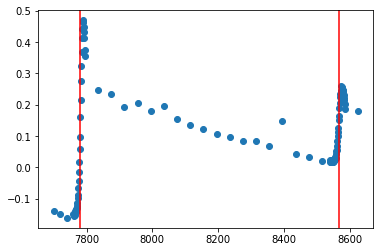

El valor de la diferencia de energía de Dy es 785.0 eV


In [19]:
DyL3 = 7781.1
DyL2 = 8566.1

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=DyL3, color='r', linestyle='-')
plt.axvline(x=DyL2, color='r', linestyle='-')
plt.show()

Dy_dE = DyL2 - DyL3
print(f'El valor de la diferencia de energía de Dy es {Dy_dE} eV')

# Er (68)

In [20]:
datos = pd.read_table(r'datos\Er.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [21]:
#datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] < 8600]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

29    8359.22
Name: Energia (eV), dtype: float64

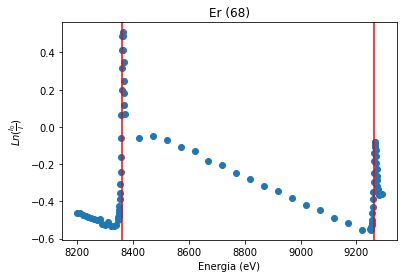

El valor de la diferencia de energía de Er es 904.0 eV


In [22]:
ErL3 = 8359.2
ErL2 = 9263.2

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=ErL3, color='r', linestyle='-')
plt.axvline(x=ErL2, color='r', linestyle='-')
plt.title('Er (68)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Er_dE = ErL2 - ErL3
print(f'El valor de la diferencia de energía de Er es {Er_dE} eV')

# Gd (64)

In [23]:
datos = pd.read_table(r'datos\Gd.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [24]:
# Recortar los datos para que solo queden los mayores a 7800 eV
datos2 = datos[datos['Energia (eV)'] > 7800]
#Encontrar el valor maximo de datos2 en la columna Ln y devolver el valor de su energia
datos2['Energia (eV)'][datos2['Ln'].idxmax()]



7930.1

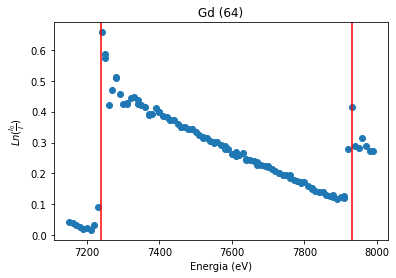

El valor de la diferencia de energía de Gd es 690 eV


In [25]:
GdL3 = 7240
GdL2 = 7930

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=GdL3, color='r', linestyle='-')
plt.axvline(x=GdL2, color='r', linestyle='-')
plt.title('Gd (64)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Gd_dE = GdL2 - GdL3
print(f'El valor de la diferencia de energía de Gd es {Gd_dE} eV')

# Hf (72)

In [26]:
datos = pd.read_table(r'datos\Hf.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [27]:
datos[datos['dx'] == datos['dx'].max()]['Energia (eV)']
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 9800]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

68    10733.22
Name: Energia (eV), dtype: float64

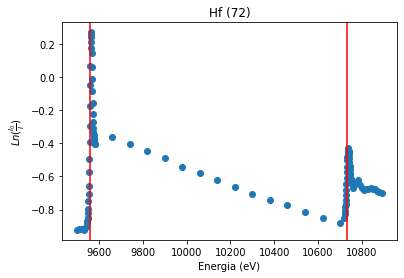

El valor de la diferencia de energía de Hf es 1173.9699999999993 eV


In [28]:
HfL3 = 9559.25
HfL2 = 10733.22

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=HfL3, color='r', linestyle='-')
plt.axvline(x=HfL2, color='r', linestyle='-')
plt.title('Hf (72)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Hf_dE = HfL2 - HfL3
print(f'El valor de la diferencia de energía de Hf es {Hf_dE} eV')

# Ho (67)

In [29]:
datos = pd.read_table(r'datos\Ho.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()


In [30]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 8300]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

21    8075.01
Name: Energia (eV), dtype: float64


60    8918.09
Name: Energia (eV), dtype: float64

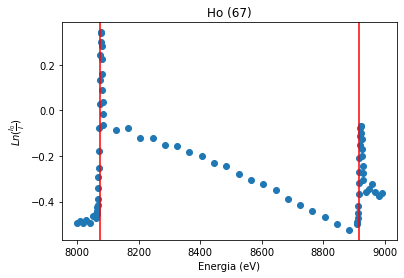

El valor de la diferencia de energía de Ho es 843 eV


In [31]:
HoL3 = 8075
HoL2 = 8918

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=HoL3, color='r', linestyle='-')
plt.axvline(x=HoL2, color='r', linestyle='-')
plt.title('Ho (67)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Ho_dE = HoL2 - HoL3
print(f'El valor de la diferencia de energía de Ho es {Ho_dE} eV')

# Nd (60)

In [32]:
datos = pd.read_table(r'datos\Nd.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [33]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
datos2 = datos[datos['Energia (eV)'] > 6500]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

29    6210.07
Name: Energia (eV), dtype: float64


75    6721.04
Name: Energia (eV), dtype: float64

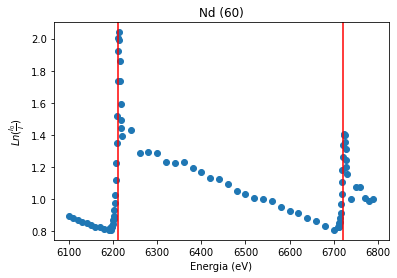

El valor de la diferencia de energía de Nd es 511 eV


In [34]:
NdL3 = 6210
NdL2 = 6721

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=NdL3, color='r', linestyle='-')
plt.axvline(x=NdL2, color='r', linestyle='-')
plt.title('Nd (60)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Nd_dE = NdL2 - NdL3
print(f'El valor de la diferencia de energía de Nd es {Nd_dE} eV')

# Pb (82)

In [35]:
datos = pd.read_table(r'datos\Pb.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [36]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] < 15000]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

126    15220.42
Name: Energia (eV), dtype: float64


33    13037.49
Name: Energia (eV), dtype: float64

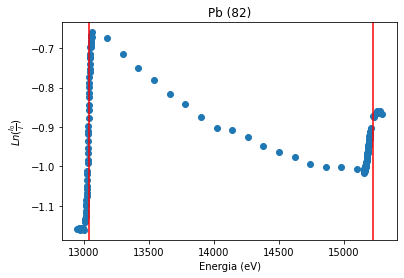

El valor de la diferencia de energía de Pb es 2183 eV


In [37]:
PbL3 = 13037
PbL2 = 15220

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=PbL3, color='r', linestyle='-')
plt.axvline(x=PbL2, color='r', linestyle='-')
plt.title('Pb (82)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Pb_dE = PbL2 - PbL3
print(f'El valor de la diferencia de energía de Pb es {Pb_dE} eV')

# Pt (78)

In [38]:
datos = pd.read_table(r'datos\Pt.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [39]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 12000]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

27    11558.43
Name: Energia (eV), dtype: float64


107    13290.35
Name: Energia (eV), dtype: float64

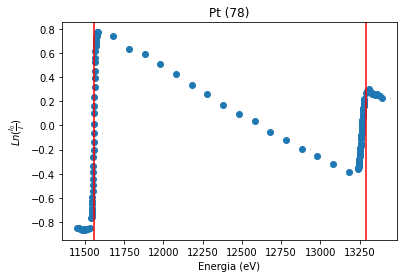

El valor de la diferencia de energía de Pt es 1731.92 eV


In [40]:
PtL3 = 11558.43
PtL2 = 13290.35

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=PtL3, color='r', linestyle='-')
plt.axvline(x=PtL2, color='r', linestyle='-')
plt.title('Pt (78)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Pt_dE = PtL2 - PtL3
print(f'El valor de la diferencia de energía de Pt es {Pt_dE} eV')

# Sm (62)

In [41]:
datos = pd.read_table(r'datos\Sm.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [42]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 6800]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

19    6714.1
Name: Energia (eV), dtype: float64


77    7308.12
Name: Energia (eV), dtype: float64

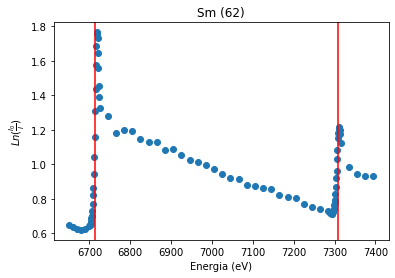

El valor de la diferencia de energía de Sm es 594.0 eV


In [43]:
SmL3 = 6714.1
SmL2 = 7308.1

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=SmL3, color='r', linestyle='-')
plt.axvline(x=SmL2, color='r', linestyle='-')
plt.title('Sm (62)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Sm_dE = SmL2 - SmL3
print(f'El valor de la diferencia de energía de Sm es {Sm_dE} eV')

# Ta (73)

In [44]:
datos = pd.read_table(r'datos\Ta.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", 'Ln'])
datos['dx'] = datos['Ln'].diff()

In [45]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
#recortar los datos y solo agarrar aquellos en donde energia > 13500
datos2 = datos[datos['Energia (eV)'] > 9900]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

22    9876.31
Name: Energia (eV), dtype: float64


75    11123.35
Name: Energia (eV), dtype: float64

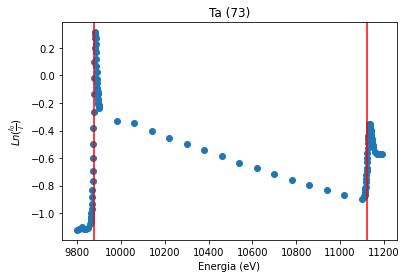

El valor de la diferencia de energía de Ta es 1247 eV


In [46]:
TaL3 = 9876
TaL2 = 11123

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=TaL3, color='r', linestyle='-')
plt.axvline(x=TaL2, color='r', linestyle='-')
plt.title('Ta (73)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

Ta_dE = TaL2 - TaL3
print(f'El valor de la diferencia de energía de Ta es {Ta_dE} eV')

# W (74)

In [47]:
datos = pd.read_table(r'datos\W.rx0', skiprows=30, delim_whitespace=True, names=['Energia (eV)', "Angulo", 'Tiempo', 'Io', "I", "Ln"])
datos['dx'] = datos['Ln'].diff()   

In [48]:
print(datos[datos['dx'] == datos['dx'].max()]['Energia (eV)'])
datos2 = datos[datos['Energia (eV)'] > 10300]
datos2[datos2['dx'] == datos2['dx'].max()]['Energia (eV)']

21    10202.29
Name: Energia (eV), dtype: float64


61    11529.25
Name: Energia (eV), dtype: float64

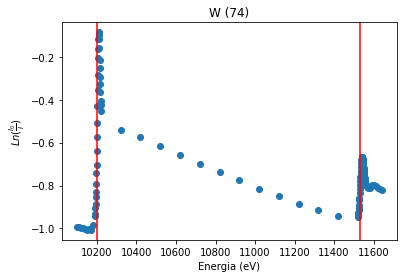

El valor de la diferencia de energía de W es 1327 eV


In [49]:
WL3 = 10202
WL2 = 11529

plt.figure()
plt.plot(datos['Energia (eV)'], datos['Ln'], 'o')
plt.axvline(x=WL3, color='r', linestyle='-')
plt.axvline(x=WL2, color='r', linestyle='-')
plt.title('W (74)')
plt.xlabel('Energia (eV)')
plt.ylabel(r'$Ln(\frac{I_{0}}{I})$')
plt.show()

W_dE = WL2 - WL3
print(f'El valor de la diferencia de energía de W es {W_dE} eV')

# Resumen (Calculo alpha)

In [50]:
Z = [79, 56, 58, 66, 68, 64, 72, 67, 60, 82, 78, 62, 73, 74]
dE = [Au_dE, Ba_dE, Ce_dE, Dy_dE, Er_dE, Gd_dE, Hf_dE, Ho_dE, Nd_dE, Pb_dE, Pt_dE, Sm_dE, Ta_dE, W_dE]
Z = np.array(Z)
dE = np.array(dE)
# Armo un dataframe con Z y dE
df = pd.DataFrame({'Z': Z, 'dE': dE})
df['Z^4'] = df['Z']**4


In [51]:
# Constante Rydberg 
R = 1.0973731568539e7
# Constante h y c
h = 6.62607004e-34
c = 299792458

E_n = (R * h * c)

In [52]:
#Hago un ajuste proporcional con scipy.odr - Eje x: Z^4, Eje y: dE
import scipy.odr as odr

model = odr.Model(lambda B, x: B*x)
data = odr.RealData(df['Z^4'], df['dE'])
odr = odr.ODR(data, model, beta0=[1])
out = odr.run()
out.pprint()

out_eV_to_Joules = out.beta[0]/6.242e+18
# Despejo para la constante de estructura fina
alpha = np.sqrt(out_eV_to_Joules*16/E_n)
err1 = (out.sd_beta[0]/6.242e+18)*16/E_n
print("---------------------------------------------------------")
print('Alpha: ', alpha, ' +- ', err1)
print("--Ref:  0.0072973525693(11)")

Beta: [4.51968781e-05]
Beta Std Error: [8.49515324e-07]
Beta Covariance: [[1.05540324e-16]]
Residual Variance: 6837.919939922541
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
---------------------------------------------------------
Alpha:  0.00729015562004017  +-  9.989330397735613e-07
--Ref:  0.0072973525693(11)


In [53]:
posiciones = df['Z^4']
nombres = ['Au', 'Ba', 'Ce', 'Dy', 'Er', 'Gd', 'Hf', 'Ho', 'Nd', 'Pb', 'Pt', 'Sm', 'Ta', 'W']

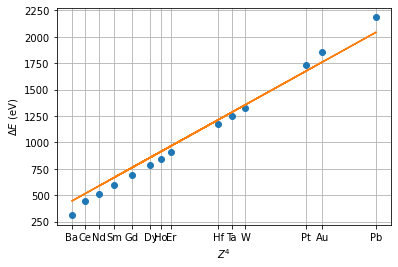

In [54]:
# PLoteo
plt.figure()
plt.plot(df['Z^4'], df['dE'], 'o')
plt.plot(df['Z^4'], out.beta[0]*df['Z^4'])
plt.xlabel(r'$Z^4$')
plt.ylabel(r'$\Delta E$ (eV)')
#Agrego en el xlabel los nombres de los elementos en su respectiva posicion de Z
# Supongamos que 'posiciones' es una lista de las posiciones de los elementos y 'nombres' es una lista de los nombres de los elementos
plt.xticks(posiciones, nombres)
#plt.title('Ajuste en función de $Z^4$')
plt.grid()
plt.show()


In [103]:
import scipy.odr as odr
# Ajusto Lineal en vez de Proporcional
model = odr.Model(lambda B, x: B[0]*x+B[1])
data = odr.RealData(df['Z^4'], df['dE'])
odr = odr.ODR(data, model, beta0=[1,1])
out = odr.run()
out.pprint()
out_eV_to_Joules = out.beta[0]/6.242e+18
alphaLineal = np.sqrt(out_eV_to_Joules*16/E_n)
err_alphaLi = (out.sd_beta[0]/6.242e+18*16/E_n)/2
ordenadaLi = out.beta[1]
err_ordenadaLi = out.sd_beta[1]

print("---------------------------------------------------------")
print('Alpha Lineal: ', alphaLineal, ' +- ', err_alphaLi)
print('Ordenada al origen: ', ordenadaLi, ' +- ', err_ordenadaLi)

Beta: [ 5.17053549e-05 -1.85408041e+02]
Beta Std Error: [6.90214483e-07 1.79560502e+01]
Beta Covariance: [[ 6.35704994e-16 -1.51028862e-08]
 [-1.51028862e-08  4.30238339e-01]]
Residual Variance: 749.3979711813645
Inverse Condition #: 1.566226724598432e-08
Reason(s) for Halting:
  Sum of squares convergence
---------------------------------------------------------
Alpha Lineal:  0.0077974094864801695  +-  4.0580671851581094e-07
Ordenada al origen:  -185.40804054331653  +-  17.956050187074062


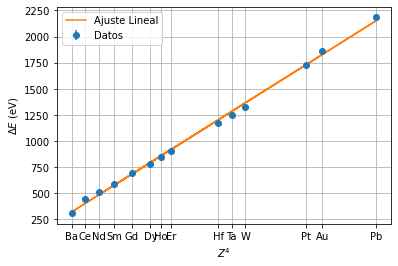

In [102]:
# Ploteo Lineal
plt.figure()
plt.errorbar(df['Z^4'], df['dE'], yerr=10, fmt='o', label = 'Datos')
plt.plot(df['Z^4'], out.beta[0]*df['Z^4']+out.beta[1], label = 'Ajuste Lineal')
plt.xlabel(r'$Z^4$')
plt.ylabel(r'$\Delta E$ (eV)')
#Agrego en el xlabel los nombres de los elementos en su respectiva posicion de Z
# Supongamos que 'posiciones' es una lista de las posiciones de los elementos y 'nombres' es una lista de los nombres de los elementos
plt.xticks(posiciones, nombres)
plt.legend()
plt.grid()
plt.show()


# $(Z-\alpha)^4$

## $\alpha = 4.15$

### Prop

In [55]:
# Calculo Z- apantallamiento
apantallamiento = 4.15
df['Z-A'] = df['Z'] - apantallamiento
df['(Z-A)^4'] = df['Z-A']**4

In [56]:
import scipy.odr as odr

model = odr.Model(lambda B, x: B*x)
data = odr.RealData(df['(Z-A)^4'], df['dE'])
odr = odr.ODR(data, model, beta0=[1])
out = odr.run()
out.pprint()

out_eV_to_Joules = out.beta[0]/6.242e+18
# Despejo para la constante de estructura fina
alpha2 = np.sqrt(out_eV_to_Joules*16/E_n)
err2 = (out.sd_beta[0]/6.242e+18)*16/E_n
print("Alpha2: ", alpha2, ' +- ', err2)

Beta: [5.6954956e-05]
Beta Std Error: [7.27991498e-07]
Beta Covariance: [[1.67184469e-16]]
Residual Variance: 3169.9811894979885
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Alpha2:  0.008183674376211363  +-  8.56034893638633e-07


In [57]:
posiciones2 = df['(Z-A)^4']

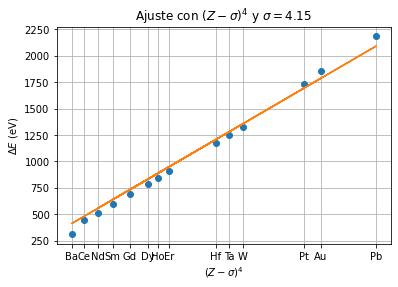

In [58]:
#Ploteo
plt.figure()
plt.plot(df['(Z-A)^4'], df['dE'], 'o', label='Datos')
plt.plot(df['(Z-A)^4'], out.beta[0]*df['(Z-A)^4'], label='Ajuste')
plt.xlabel(r'$(Z-\sigma)^4$')
plt.ylabel(r'$\Delta E$ (eV)')
plt.title('Ajuste con $(Z-\sigma)^4$ y $\sigma = 4.15$')
plt.xticks(posiciones2, nombres)
plt.grid()

plt.show()


### Lineal

In [69]:
# Pruebo ajustar Z-A^4 vs dE pero con un ajuste lineal
import scipy.odr as odr

#creo el modelo lineal con ordenada al origen
model = odr.Model(lambda B, x: B[0]*x+B[1])
data = odr.RealData(df['(Z-A)^4'], df['dE'])
odr = odr.ODR(data, model, beta0=[1,1])
out = odr.run()
out.pprint()

out_eV_to_Joules = out.beta[0]/6.242e+18
# Despejo para la constante de estructura fina
alphaL = np.sqrt(out_eV_to_Joules*16/E_n)
errL = (out.sd_beta[0]/6.242e+18)*16/E_n
print("AlphaL: ", alphaL, ' +- ', errL)
print("Ordenada: ", out.beta[1], 'eV +- ', out.sd_beta[1])


Beta: [8.79344005e-05 5.78650770e+00]
Beta Std Error: [8.42089349e-07 1.12353525e+01]
Beta Covariance: [[ 1.83674161e-15 -2.16647183e-08]
 [-2.16647183e-08  3.26967901e-01]]
Residual Variance: 386.0719810912263
Inverse Condition #: 3.503114943580259e-08
Reason(s) for Halting:
  Sum of squares convergence
AlphaL:  0.01016861919809268  +-  9.902009416400562e-07
Ordenada:  5.7865077006136 eV +-  11.235352484319282


In [ ]:
# ploteo
plt.figure()
plt.plot(df['(Z-A)^4'], df['dE'], 'o', label='Datos')


## Param libres

### Sin ordenada

In [107]:
# Ahora con apantallamiento como parametro libre

import scipy.odr as odr

def f2(B, x):
    return B[0]*(x-B[1])**4 

model = odr.Model(f2)
data = odr.RealData(df['Z'], df['dE'])
odr = odr.ODR(data, model, beta0=[5e-3, 5], maxit=10000)
out = odr.run()
out.pprint()

out_eV_to_Joules = out.beta[0]/6.242e+18
# Despejo para la constante de estructura fina
alpha4 = np.sqrt(out_eV_to_Joules*16/E_n)
err4 = (out.sd_beta[0]/6.242e+18)*16/E_n
sigma4 = out.beta[1]
err_sigma4 = out.sd_beta[1]
print("Alpha3: ", alpha4, ' +- ', (out.sd_beta[0]/6.242e+18)*16/E_n)
print("Valor apantallamiento: ", sigma4, ' +- ', err_sigma4)


print("---------------------------------------------------------")
print("Error relativo de alpha: ", (err1/alpha)*100, '%')

Beta: [8.84856479e-05 1.14616121e+01]
Beta Std Error: [5.78863205e-06 9.41572236e-01]
Beta Covariance: [[1.46973196e-10 2.36858312e-05]
 [2.36858312e-05 3.88860237e+00]]
Residual Variance: 0.22798892528721706
Inverse Condition #: 0.0008290078930215741
Reason(s) for Halting:
  Sum of squares convergence
Alpha3:  0.01020044216417109  +-  6.806770457940836e-06
Valor apantallamiento:  11.461612067953524  +-  0.9415722361957536
---------------------------------------------------------
Error relativo de alpha:  0.24513386109692453 %


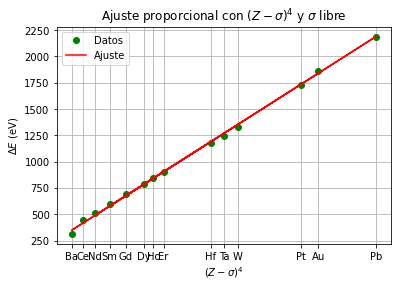

In [111]:
df['Z-A'] = df['Z'] - sigma4
df['(Z-A)^4'] = df['Z-A']**4
posiciones2 = df['(Z-A)^4']
# Ploteo 
plt.figure()
plt.plot(df['(Z-A)^4'], df['dE'], 'go', label='Datos')
plt.plot(df['(Z-A)^4'], out.beta[0]*df['(Z-A)^4'], label='Ajuste', color='red')
plt.xlabel(r'$(Z-\sigma)^{4}$')
plt.ylabel(r'$\Delta E$ (eV)')
plt.xticks(posiciones2, nombres)
plt.legend()
plt.title('Ajuste proporcional con $(Z-\sigma)^4$ y $\sigma$ libre')
plt.grid()
plt.show()


### Con ordenada

In [99]:
# Ahora con apantallamiento como parametro libre

import scipy.odr as odr

def f2(B, x):
    return B[0]*(x-B[1])**4 + B[2]

model = odr.Model(f2)
data = odr.RealData(df['Z'], df['dE'])
odr = odr.ODR(data, model, beta0=[5e-3, 10, 0], maxit=10000)
out = odr.run()
out.pprint()

out_eV_to_Joules = out.beta[0]/6.242e+18
# Despejo para la constante de estructura fina
alpha3 = np.sqrt(out_eV_to_Joules*16/E_n)
err13 = (out.sd_beta[0]/6.242e+18)*16/E_n
sigma = out.beta[1]
err_sigma = out.sd_beta[1]
ordenadaS = out.beta[2]
err_ordenadaS = out.sd_beta[2]
print("Alpha3: ", alpha3, ' +- ', (out.sd_beta[0]/6.242e+18)*16/E_n)
print("Valor apantallamiento: ", sigma, ' +- ', err_sigma)
print("Ordenada (eV): ", ordenadaS, ' +- ', err_ordenadaS)
errRel_alphaL = (err1/alpha3)*100
print("-----------------------------------------------")
print("Error relativo de alpha: ", errRel_alphaL, '%')



Beta: [ 6.18269468e-05  4.20907056e+00 -1.08179733e+02]
Beta Std Error: [1.51975977e-05 5.22420052e+00 7.83051804e+01]
Beta Covariance: [[1.18356742e-09 4.05982865e-04 5.91069909e-03]
 [4.05982865e-04 1.39856543e+02 2.05911893e+03]
 [5.91069909e-03 2.05911893e+03 3.14212965e+04]]
Residual Variance: 0.1951447572504329
Inverse Condition #: 5.75823516359752e-10
Reason(s) for Halting:
  Sum of squares convergence
Alpha3:  0.008526513430183397  +-  1.7870639951378907e-05
Valor apantallamiento:  4.209070564331722  +-  5.22420052188547
Ordenada (eV):  -108.17973313325142  +-  78.30518038906253
-----------------------------------------------
Error relativo de alpha:  0.20958906706365824 %


In [87]:
df['Z-A'] = df['Z'] - sigma
df['(Z-A)^4'] = df['Z-A']**4

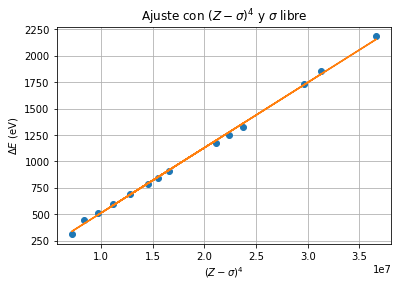

In [89]:
#Ploteo
plt.figure()
plt.plot(df['(Z-A)^4'], df['dE'], 'o', label='Datos')
plt.plot(df['(Z-A)^4'], out.beta[0]*df['(Z-A)^4'] + out.beta[2], label='Ajuste')
plt.xlabel(r'$(Z-\sigma)^{4}$')
plt.ylabel(r'$\Delta E$ (eV)')
plt.title('Ajuste con $(Z-\sigma)^4$ y $\sigma$ libre')
plt.grid()
plt.show()

# Resumen Final

In [62]:
print("Valores hallados:")
print("Sin apantallamiento: ", alpha, "+- ", err1)
print("Con apantallamiento: ", alpha2, "+- ", err2)
print("Con param libres:    ", alpha3, "+- ", (out.sd_beta[0]/6.242e+18)*16/E_n)
print("Sigma: ", out.beta[1], ' +- ', out.sd_beta[1])
print("Referencia:           0.0072973525693(11)")

Valores hallados:
Sin apantallamiento:  0.00729015562004017 +-  9.989330397735613e-07
Con apantallamiento:  0.008183674376211363 +-  8.56034893638633e-07
Con param libres:     0.010200441996032648 +-  6.806762043831397e-06
Sigma:  11.461611592513707  +-  0.9415706901337425
Referencia:           0.0072973525693(11)


## Actualizado

In [104]:
print("Valores hallados:    Valor +- Error - Error relativo")
print("Sin apantallamiento (lineal): ", alphaLineal, "+- ", err_alphaLi, " - ", err_alphaLi/alphaLineal*100, "%")
print("Con apantallamiento (lineal): ", alpha3, "+- ", err13, " - ", err13/alpha3*100, "%")
print("Con apantallamiento (prop):   ", alpha4, "+- ", err4, " - ", err4/alpha4*100, "%")

Valores hallados:    Valor +- Error - Error relativo
Sin apantallamiento (lineal):  0.0077974094864801695 +-  4.0580671851581094e-07  -  0.005204378700636848 %
Con apantallamiento (lineal):  0.008526513430183397 +-  1.7870639951378907e-05  -  0.20958906706365824 %
Con apantallamiento (prop):    0.01020044216417109 +-  6.806770457940836e-06  -  0.06673015099139057 %
